In [1]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from matplotlib.lines import Line2D
sz_ft = 20
sz_lb = 14
color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']
from cosmo import CosmoCalc
import sims
import tools
import lensing
import foregrounds as fg
import experiments as exp

## Generating CMB Temperature Anisotropy Maps

In [2]:
nber_maps = 1
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
cmb_map = sims.cmb_mock_data(map_params, l, cl)

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


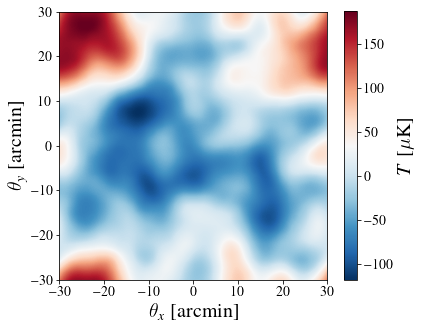

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
_, extent = tools.make_grid(map_params)

im = ax.imshow(cmb_map, extent = extent, cmap = cm.RdBu_r)
cb = fig.colorbar(im, shrink = 0.825)
cb.set_label(label=r'$T \ [\mu$'+'K]', size=sz_ft)
cb.ax.tick_params(labelsize=sz_lb)
ax.set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
ax.set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
ax.tick_params(labelsize = sz_lb)

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/cmb_temperature_anisotropy_map.eps', dpi = 200, bbox_inches = 'tight')

## Cluster Convergence and Deflection Map

In [4]:
map_params = [240, 0.25, 240, 0.25]
kappa_map = lensing.NFW(6e14, 3, 1, 1100).convergence_map(map_params)
alpha_vec = lensing.deflection_from_convergence(map_params, kappa_map)
alphaX, alphaY = alpha_vec
alpha_map = np.hypot(alphaX, alphaY)

/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2


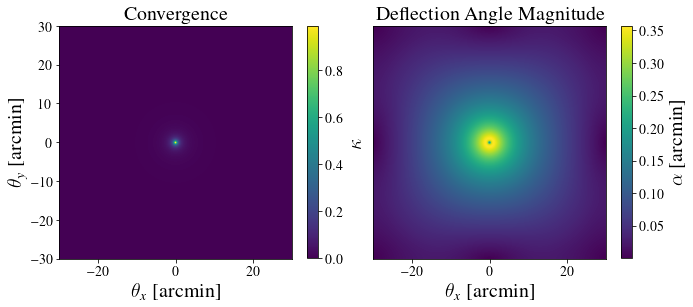

In [5]:
_, extent = tools.make_grid(map_params)
fig, axarr = plt.subplots(1,2, figsize=(9.4,9.4))

im0 = axarr[0].imshow(kappa_map, extent = extent)
cb0 = fig.colorbar(im0, ax = axarr[0], shrink = 0.342)
cb0.set_label(label = r'$\kappa$', size=sz_ft)
cb0.ax.tick_params(labelsize=sz_lb)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_title('Convergence', fontsize = sz_ft)
axarr[0].tick_params(labelsize = sz_lb)

im1 = axarr[1].imshow(alpha_map, extent = extent)
cb1 = fig.colorbar(im1, ax = axarr[1], shrink = 0.342)
cb1.set_label(label = r'$\alpha \ $' + '[arcmin]', size=sz_ft)
cb1.ax.tick_params(labelsize=sz_lb)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_title('Deflection Angle Magnitude', fontsize = sz_ft)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz_lb)

fig.tight_layout(pad=0)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/convergence_deflection_map.eps', dpi = 200, bbox_inches = 'tight')

## kSZ and tSZ Cutout

In [6]:
map_params = [40, 0.25, 40, 0.25]
fname = '/Volumes/Extreme_SSD/codes/master_thesis/code/data/mdpl2_cutouts_for_tszksz_clus_detection_M1.7e+14to2.3e+14_z0.6to0.8_15320haloes_boxsize20.0am.npz'
cutouts_dic = np.load(fname, allow_pickle = 1, encoding= 'latin1')['arr_0'].item()
mass_z_key = list(cutouts_dic.keys())[0]
cutouts = cutouts_dic[mass_z_key]
scale_fac = fg.compton_y_to_delta_Tcmb(145, uK = True)
tsz_cutouts, ksz_cutouts = [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutouts.append(cutouts[keyname]['y']*scale_fac)
    ksz_cutouts.append(cutouts[keyname]['ksz']*random.randrange(-1, 2, 2))
tsz_cutout = tsz_cutouts[1]
ksz_cutout = ksz_cutouts[1]

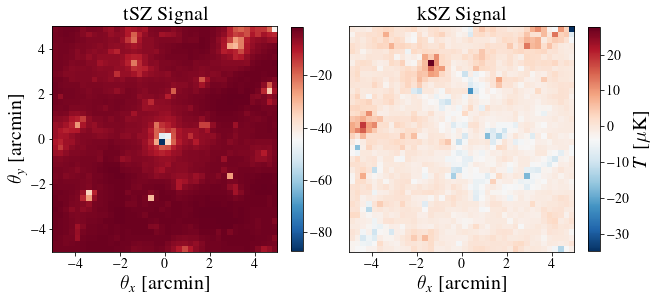

In [7]:
_, extent = tools.make_grid(map_params)
fig, axarr = plt.subplots(1,2, figsize=(9,9))

im0 = axarr[0].imshow(tsz_cutout, extent = extent, cmap = cm.RdBu_r)
cb0 = fig.colorbar(im0, ax = axarr[0], shrink = 0.347)
cb0.ax.tick_params(labelsize=sz_lb)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_title('tSZ Signal', fontsize = sz_ft)
axarr[0].tick_params(labelsize = sz_lb)

im1 = axarr[1].imshow(ksz_cutout, extent = extent, cmap = cm.RdBu_r)
cb1 = fig.colorbar(im1, ax = axarr[1], shrink = 0.347)
cb1.set_label(label=r'$T \ [\mu$'+'K]', size=sz_ft)
cb1.ax.tick_params(labelsize=sz_lb)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_title('kSZ Signal', fontsize = sz_ft)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz_lb)

fig.tight_layout(pad=0)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/tSZ_kSZ_cutout.eps', dpi = 200, bbox_inches = 'tight')

## Extragalactic Power Spectra

In [8]:
l, cl = CosmoCalc().cmb_power_spectrum()
l, cl_radio = fg.extragalactic_power_spectrum(150, components = ['radio'])
l, cl_cib = fg.extragalactic_power_spectrum(150, components = ['cib'])
l, cl_tsz = fg.extragalactic_power_spectrum(150, components = ['tsz'])
l, cl_ksz = fg.extragalactic_power_spectrum(150, components = ['ksz'])
l, cl_tsz_cib = fg.extragalactic_power_spectrum(150, components = ['tsz_cib'])
l, cl_fg_total = fg.extragalactic_power_spectrum(150, components = 'all')

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:129: RuntimeWarning: divide by zero encountered in true_divide
  cl_tsz =  (2*np.pi)/(l * (l+1)) * dl_tsz
/Volumes/Extreme_SSD/codes/master_t

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


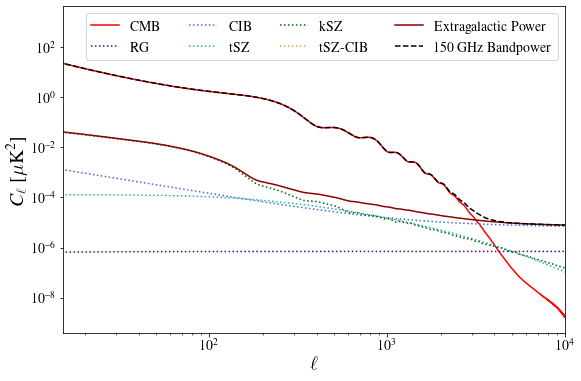

In [9]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(l, cl, 'red', label = r'CMB')
ax.plot(l, cl_radio,  color = color_arr[0], label = r'RG', ls = ':')
ax.plot(l, cl_cib, color = color_arr[1], label = r'CIB', ls = ':')
ax.plot(l, cl_tsz, color = color_arr[2], label = r'tSZ', ls = ':')
ax.plot(l, cl_ksz, color = color_arr[3], label = r'kSZ', ls = ':')
ax.plot(l, cl_tsz_cib, color = color_arr[4], label = r'tSZ-CIB', ls = ':')
ax.plot(l, cl_fg_total, color_arr[5], label = r'Extragalactic Power')
ax.plot(l, cl_fg_total+cl, 'black', label = r'150 GHz Bandpower', ls = '--')
ax.tick_params(labelsize = sz_lb)
ax.set_xlim(15, 10000) 
ax.set_xlabel(r'$\ell$', fontsize = sz_ft)
ax.set_ylabel(r'$C_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz_ft)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol = 4, prop={'size': sz_lb}) 

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/extragalactic_power_spectra.eps', dpi = 200, bbox_inches = 'tight')

## Experimental Specifications

In [28]:
specs_dic, corr_noise_bands, rho = exp.specs('so')
freq_arr = sorted( specs_dic.keys() )
beam_fwhm_arr, whitenoise_arr, rednoise_arr, elknee_arr, alphaknee_arr = [], [], [], [], []
for freq in freq_arr:
    beam_fwhm, noiseval_white, noiseval_red, elknee, alphaknee = specs_dic[freq]
    beam_fwhm_arr.append(beam_fwhm)
    whitenoise_arr.append(noiseval_white)
    rednoise_arr.append(noiseval_red)
    elknee_arr.append(elknee)
    alphaknee_arr.append(alphaknee) 


beam_arr = []
for i in range(len(beam_fwhm_arr)):
    l, bl = exp.beam_power_spectrum(beam_fwhm_arr[i])
    beam_arr.append(np.sqrt(bl))     
    
noise_power_white_arr = []
for i in range(len(whitenoise_arr)):
    l, nl = exp.white_noise_power_spectrum(whitenoise_arr[i])
    noise_power_white_arr.append(nl)    
    
noise_power_red_arr = []
for i in range(len(rednoise_arr)):
    l, nl = exp.red_noise_power_spectrum(rednoise_arr[i], elknee_arr[i], alphaknee_arr[i])
    noise_power_red_arr.append(nl)
    
l, nl_dic = exp.noise_power_spectra_dic(experiment = 'so', deconvolve = False, use_cross_power = False)
noise_power_arr = []
for freq in freq_arr:
    noise_power_arr.append(nl_dic[freq])

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:167: RuntimeWarning: divide by zero encountered in power
  nl_white = np.tile(delta_white_radians**2, int(max(l)) + 1 )
/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:174: RuntimeWarning: divide by zero encountered in power
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


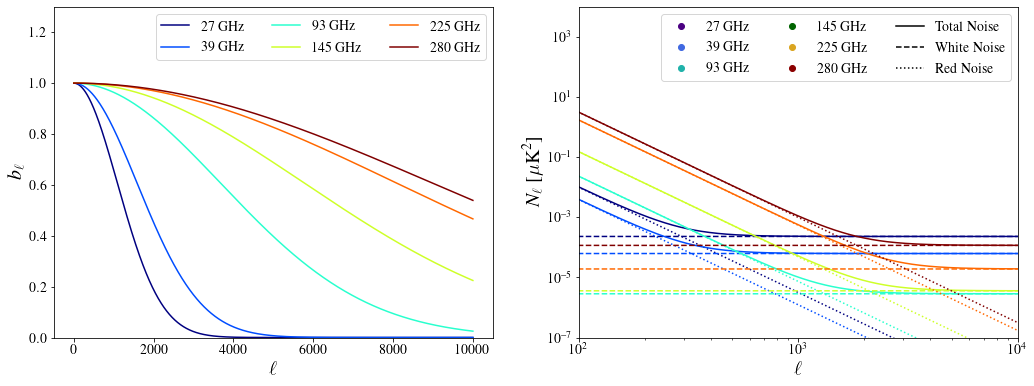

In [47]:
fig, axarr = plt.subplots(1,2, figsize=(15,6))
cmap = cm.jet
color_grad = [cmap(int(d)) for d in np.linspace(0, 255, len(freq_arr))]

for i in range(len(freq_arr)):
    axarr[0].plot(l, beam_arr[i],  color = color_grad[i], label = str(freq_arr[i])+' GHz')
axarr[0].set_xlabel(r'$\ell$', fontsize = sz_ft)
axarr[0].set_ylabel(r'$b_{\ell}$', fontsize = sz_ft)
axarr[0].set_ylim(0,1.3)
axarr[0].tick_params(labelsize = sz_lb)
axarr[0].legend(ncol = 3, prop={'size': sz_lb}) 

for i in range(len(freq_arr)):
    axarr[1].plot(l, noise_power_arr[i],  color = color_grad[i], ls = '-')
    axarr[1].plot(l, noise_power_white_arr[i],  color = color_grad[i], ls = '--')
    axarr[1].plot(l, noise_power_red_arr[i],  color = color_grad[i], ls = ':')

axarr[1].set_ylabel(r'$N_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz_ft)
axarr[1].tick_params(labelsize = sz_lb)
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlim(100, 10000) 
axarr[1].set_ylim(1e-7, 1e4)
axarr[1].set_xlabel(r'$\ell$', fontsize = sz_ft)
patches = [Line2D([0], [0], color = c, marker='o', ls = '') for c in color_arr]
patches+= [Line2D([0], [0], color='black',linestyle='-')]
patches+= [Line2D([0], [0], color='black',linestyle='--')]
patches+= [Line2D([0], [0], color='black',linestyle=':')]
labels = [str(freq_arr[0])+' GHz', str(freq_arr[1])+' GHz', str(freq_arr[2])+' GHz', str(freq_arr[3])+' GHz',
          str(freq_arr[4])+' GHz', str(freq_arr[5])+' GHz','Total Noise', 'White Noise', 'Red Noise']
axarr[1].legend(patches, labels, ncol = 3, prop={'size': sz_lb})

fig.tight_layout(pad=3)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/beam_and_noise.eps', dpi = 200, bbox_inches = 'tight')

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:169: RuntimeWarning: divide by zero encountered in power
  
/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:176: RuntimeWarning: divide by zero encountered in power
  
/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
<ipython-input-45-bdf2c84e9b30>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)
<ipython-input-45-bdf2c84e9b30>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)
<ipython-input-45-bdf2c84e9b30>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)
<ipython-input-45-bdf2c84e9b30>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)
<ipython-input-45-bdf2c84e9b30>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl

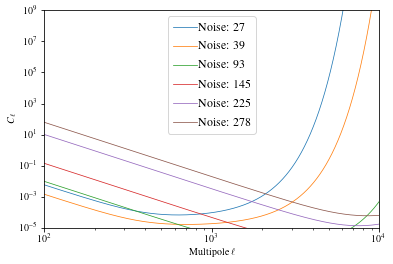

In [45]:
specs_dic, corr_noise_bands, rho = exp.specs('s4wide')
freqarr = sorted( specs_dic.keys() )
el, nl_dic = exp.noise_power_spectra_dic(experiment = 's4wide', deconvolve = True, use_cross_power = False)
el_camb, cl_TT = CosmoCalc().cmb_power_spectrum()

fig, ax = plt.subplots(figsize = (6,4))
ax.set_xscale('log')
ax.set_yscale('log')
fsval = 8
lwval = 0.75
plot_weights = 0
xmin, xmax = 100, 10000



mv_comb_arr = []
for freq in freqarr:
    nl = nl_dic[(freq)]
    plt.plot(el, nl, lw = lwval, ls = '-', label = r'Noise: %s' %(freq))#, alpha = 0.5)
    mv_comb_arr.append(1./nl)
mv_comb = 1./(np.sum(mv_comb_arr, axis = 0))

   
    
plt.xlim(xmin, xmax);
plt.ylim(1e-5,1e9);
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.legend(fontsize = 12, handlelength = 2., handletextpad = 0.1)

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:169: RuntimeWarning: divide by zero encountered in power
  
/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
<ipython-input-46-1ffa9c9c6c75>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)
<ipython-input-46-1ffa9c9c6c75>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)
<ipython-input-46-1ffa9c9c6c75>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)
<ipython-input-46-1ffa9c9c6c75>:20: RuntimeWarning: divide by zero encountered in true_divide
  mv_comb_arr.append(1./nl)


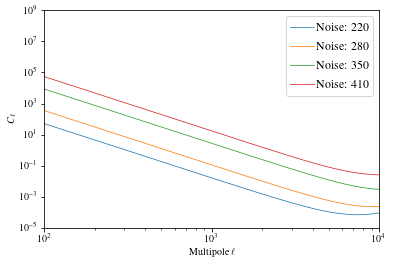

In [46]:
specs_dic, corr_noise_bands, rho = exp.specs('ccatp2')
freqarr = sorted( specs_dic.keys() )
el, nl_dic = exp.noise_power_spectra_dic(experiment = 'ccatp2', deconvolve = True, use_cross_power = False)
el_camb, cl_TT = CosmoCalc().cmb_power_spectrum()

fig, ax = plt.subplots(figsize = (6,4))
ax.set_xscale('log')
ax.set_yscale('log')
fsval = 8
lwval = 0.75
plot_weights = 0
xmin, xmax = 100, 10000



mv_comb_arr = []
for freq in freqarr:
    nl = nl_dic[(freq)]
    plt.plot(el, nl, lw = lwval, ls = '-', label = r'Noise: %s' %(freq))#, alpha = 0.5)
    mv_comb_arr.append(1./nl)
mv_comb = 1./(np.sum(mv_comb_arr, axis = 0))

   
    
plt.xlim(xmin, xmax);
plt.ylim(1e-5,1e9);
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.legend(fontsize = 12, handlelength = 2., handletextpad = 0.1)